In [1]:
import clear_sky_insolation as csi # 各方位別 晴天日 全日射量を計算するモジュール
import calc_clear_sky_insolation as calc_csi ## 各方位別 晴天日 全日射量をグラフ表示するモジュール

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

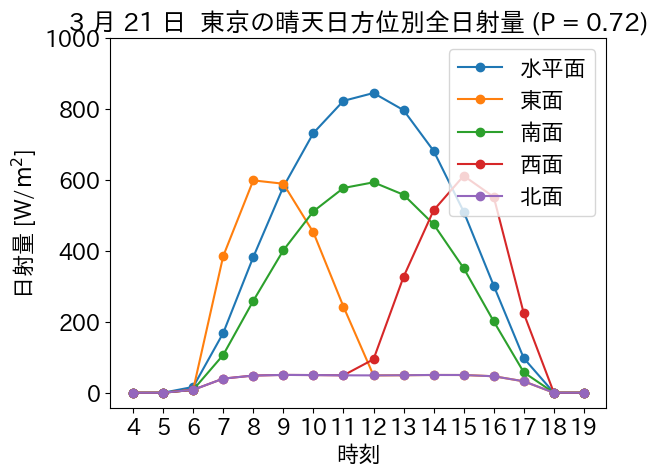

In [2]:
# 3月21日(春分の日) 東京の晴天日 方位別の全日射量をグラフ表示(P = 0.72)

start_t = 4 # 開始時刻
end_t = 19 # 終了時刻
month = 3 # 月
day = 21 # 日
Lon = 139.77 # 経度 [deg]
Lat = 35.68 # 緯度 [deg]
tz = 9 # 時間ゾーン [h]
P = 0.72 # 大気透過率

g_time, g_horizon, g_east, g_south, g_west,g_north = calc_csi.calc_clear_sky(start_t, end_t, month, day, Lon, Lat, tz, P) # 各方位別 晴天日 全日射量を計算
calc_csi.plot_graph(g_time, g_horizon, g_east, g_south, g_west,g_north, month, day, P) # 各時刻の各方位別による晴天日 全日射量をグラフ表示

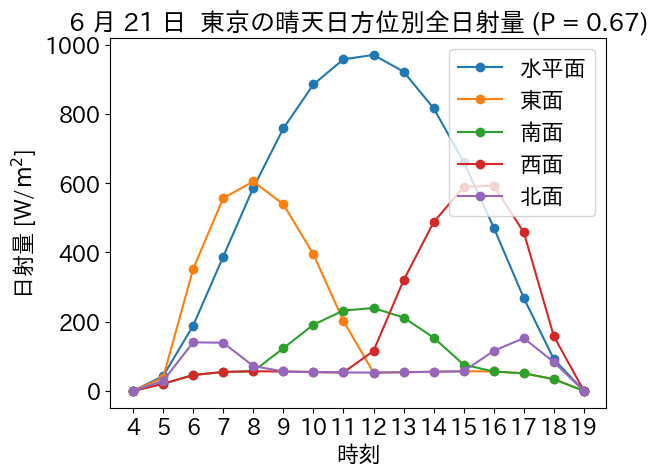

In [3]:
# 6月21日(夏至) 東京の晴天日 方位別の全日射量をグラフ表示(P = 0.67)

start_t = 4 # 開始時刻
end_t = 19 # 終了時刻
month = 6 # 月
day = 21 # 日
Lon = 139.77 # 経度 [deg]
Lat = 35.68 # 緯度 [deg]
tz = 9 # 時間ゾーン [h]
P = 0.67 # 大気透過率

g_time, g_horizon, g_east, g_south, g_west,g_north = calc_csi.calc_clear_sky(start_t, end_t, month, day, Lon, Lat, tz, P) # 各方位別 晴天日 全日射量を計算
calc_csi.plot_graph(g_time, g_horizon, g_east, g_south, g_west,g_north, month, day, P) # 各時刻の各方位別による晴天日 全日射量をグラフ表示

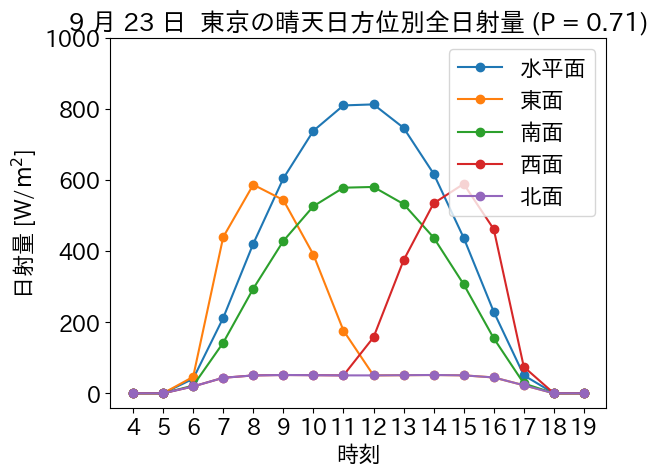

In [4]:
# 9月23日(秋分の日) 東京の晴天日 方位別の全日射量をグラフ表示(P = 0.71)

start_t = 4 # 開始時刻
end_t = 19 # 終了時刻
month = 9 # 月
day = 23 # 日
Lon = 139.77 # 経度 [deg]
Lat = 35.68 # 緯度 [deg]
tz = 9 # 時間ゾーン [h]
P = 0.71 # 大気透過率

g_time, g_horizon, g_east, g_south, g_west,g_north = calc_csi.calc_clear_sky(start_t, end_t, month, day, Lon, Lat, tz, P) # 各方位別 晴天日 全日射量を計算
calc_csi.plot_graph(g_time, g_horizon, g_east, g_south, g_west,g_north, month, day, P) # 各時刻の各方位別による晴天日 全日射量をグラフ表示

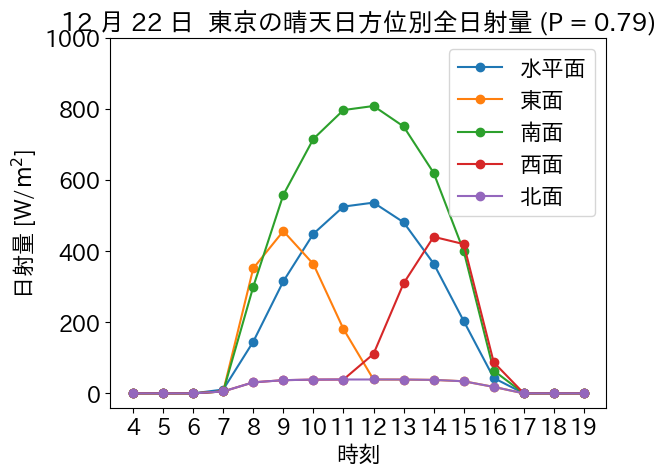

In [5]:
# 12月22日(冬至) 東京の晴天日 方位別の全日射量をグラフ表示(P = 0.79)

start_t = 4 # 開始時刻
end_t = 19 # 終了時刻
month = 12 # 月
day = 22 # 日
Lon = 139.77 # 経度 [deg]
Lat = 35.68 # 緯度 [deg]
tz = 9 # 時間ゾーン [h]
P = 0.79 # 大気透過率

g_time, g_horizon, g_east, g_south, g_west,g_north = calc_csi.calc_clear_sky(start_t, end_t, month, day, Lon, Lat, tz, P) # 各方位別 晴天日 全日射量を計算
calc_csi.plot_graph(g_time, g_horizon, g_east, g_south, g_west,g_north, month, day, P) # 各時刻の各方位別による晴天日 全日射量をグラフ表示

# 各方位別の晴天日 全日射量の計算方法

### 1.太陽位置を求める
#### 太陽高度、方位角を計算(式1、2)
### 2.晴天日 日射量の計算
#### 法線面直達日射量、水平面天空日射量を計算(式8、10)
#### 傾斜面に入る直達日射量、天空日射量を計算(式11、15) → 式11 + 式15が全日射量


### 1.太陽位置を求める（太陽高度、方位角を計算）

太陽高度の計算式を式1に示す。
$$\sin h = \sin \phi \sin \delta + \cos \phi \cos \delta \cos \omega  \tag{1} $$
太陽方位角は式2、3
$$ \cos A = \frac{\sin h \sin \phi - \sin \delta}{\cos h \cos \phi} = CA \tag{2} $$
$$ A = 
\begin{cases}
\cos^{-1}(CA) & (\omega \geq 0)\\
-\cos^{-1}(CA) & (\omega < 0)
\end{cases} \tag{3}$$
となる。
<br>

上式を計算する際に必要な計算式を以下の示す。
$$ \omega = (t_{as} - 12) \times 15 \tag{4} $$
$$ t_{as} = t + E + \frac{L-L_{s}}{15} \tag{5} $$
$$ L_{s} = TZ \cdot 15 \tag{6} $$

以下の表記を
<br>
$h$: 太陽高度 [deg]、A: 太陽方位角 [deg]、$\phi$: 経度 [deg]、$\delta$: 太陽赤緯 [deg]、$\omega$: 時角 [deg]
$t_{as}$: 真太陽時 [h]、$t$: 標準時 [h]、$E$: 均時差 [h]、$L$: 経度 [deg]、
$L_{s}$: 標準子午線の経度 [deg]、$TZ$: 時間ゾーン [h]
<br>
とする。



### 2.晴天日 日射量の計算 (法線面直達日射量、水平面天空日射量を計算)

　傾斜面に入る全日射量は傾斜面に入る直達日射、天空日射、反射日射の和であり式7に示す(今回は反射日射は無視する)。
$$ I_{e} = I_{d} + I_{s} + I_{r} \tag{7}$$
$I_{e}$: 傾斜面に入る全日射量 [W/m<sup>2</sup>]、$I_{d}$: 傾斜面に入る直達日射量 [W/m<sup>2</sup>]、$I_{s}$: 傾斜面に入る天空日射量 [W/m<sup>2</sup>]、
$I_{s}$: 傾斜面に入る反射日射量 [W/m<sup>2</sup>]

　法線面直達日射量 $I_{dn}$ [W/m<sup>2</sup>] の式(ブーゲの式)は、
$$ I_{dn} = I_{0} P ^{1/\sin h}\tag{8} $$
$$ I_{0} = 1382 \cdot \{1 + 0.033 \times \cos (2 \pi n /365)\} \tag{9} $$
となる。$I_{0}$: 大気圏外日射量 [W/m<sup>2</sup>]、$P$: 大気透過率

　水平面天空日射量 $I_{sky}$ [W/m<sup>2</sup>] を式10に示す。
$$ I_{sky} = (I_{o} - I_{dn}) \sin h [ (0.66 - 0.32 \sin h) \{ 0.5 + (0.4 - 0.3P)\sin h \} ] \tag{10}$$
<br>

傾斜面に入る直達日射量は
$$ I_{d} = I_{dn} \cos \theta \tag{11} $$
となり、法線面直達日射量と入射角で表すことができる。入射角 $\theta$ [deg]は
$$ \cos \theta = \cos W_{T} \sin h + \sin W_{T} \cos h \cos(A - W_{A}) \tag{12} $$
となる。ただし、傾斜面の傾斜角 $W_{T}$ が垂直面($W_{T}$ = 90 deg)のとき、式13、
$$ \cos \theta = \cos h \cos(A - W_{A}) \tag{13} $$
水平面($W_{T}$ = 0 deg)のとき、式14、
$$ \cos \theta = \sin h \tag{14}$$
と示される。$W_{A}$: 傾斜面の方位角 [deg]
<br>

傾斜面に入る天空日射量は式15より
$$ I_{s} = I_{sky} F_{s} \tag{15}$$
$$ F_{s} = \frac{1 + \cos W_{T}}{2} \tag{16} $$
となる。水平面のとき、$W_{T}$ = 0 [deg] より $F_{s}$ = 1、垂直面は$W_{T}$ = 90 [deg]より $F_{s}$ = 0.5
である。$F_{s}$ : 傾斜面から天空を見る形態係数
<br>

傾斜面に入る反射日射量を式17に示す。
$$ I_{r} = I_{h} \rho_{G}(1-F_{s}) \tag{17}$$
$I_{h}$: 水平面全日射量 [W/m<sup>2</sup>]、$\rho$: 地面の反射率

上記より、傾斜面に入る各日射量が計算できたので、式7の右辺に代入する。
